<a href="https://colab.research.google.com/github/nishantruwari/projects/blob/main/cv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U torch torchvision torchaudio

   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/865.2 MB 12.1 MB/s eta 0:00:49

In [2]:
!pip install opencv-python

In [3]:
!pip install pycocotools

In [4]:
!pip install git+https://github.com/facebookresearch/detectron2.git

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-95xpsk2p
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-95xpsk2p
  Resolved https://github.com/facebookresearch/detectron2.git to commit 400a49c1ec11a18dd25aea3910507bc3bcd15794
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.8 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp311

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os


In [3]:
project_root = '/content/drive/MyDrive/coco_segmentation_project'


In [4]:
os.makedirs(os.path.join(project_root, 'coco_subset'), exist_ok=True)

In [5]:
os.makedirs(os.path.join(project_root, 'outputs'), exist_ok=True)

In [6]:
print("Project folders created at:", project_root)

Project folders created at: /content/drive/MyDrive/coco_segmentation_project


Extraction complete.
Extraction complete.


In [6]:
# ✅ Re-download and extract COCO val2017 images and annotation zip files

import requests, zipfile, io
import os

def download_and_extract(url, extract_to):
    print(f"Downloading from {url}")
    r = requests.get(url)
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall(path=extract_to)
    print(f"Extracted to {extract_to}")

# Redefine project_root if needed
project_root = '/content/drive/MyDrive/coco_segmentation_project'

# Paths for image and annotation zips
images_url = "http://images.cocodataset.org/zips/val2017.zip"
annotations_url = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"

# Make sure target directory exists
os.makedirs(os.path.join(project_root, 'coco_subset'), exist_ok=True)

# Download and extract
download_and_extract(images_url, os.path.join(project_root, 'coco_subset'))
download_and_extract(annotations_url, os.path.join(project_root, 'coco_subset'))

print("✅ Download complete. Try re-running the annotation loading cell again after this.")


Extracted to /content/drive/MyDrive/coco_segmentation_project/coco_subset
Extracted to /content/drive/MyDrive/coco_segmentation_project/coco_subset
✅ Download complete. Try re-running the annotation loading cell again after this.


In [13]:
# ✅ Step 5: Load and preprocess a small COCO subset for segmentation
from pycocotools.coco import COCO
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import glob

# Paths to COCO val images and annotation file
image_dir = os.path.join(project_root,# ✅ Step 10: Create a custom PyTorch Dataset for COCO segmentation
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CocoSegmentationDataset(Dataset):
    def __init__(self, coco, img_ids, transform=None, target_transform=None):
        self.coco = coco
        self.img_ids = img_ids
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img, mask = load_image_and_mask(self.coco, img_id)

        # Resize for uniformity (smaller for Colab limits)
        img = cv2.resize(img, (224, 224))
        mask = cv2.resize(mask, (224, 224), interpolation=cv2.INTER_NEAREST)

        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            mask = self.target_transform(mask)

        return img, mask.long()

# Define transforms
transform_img = transforms.Compose([
    transforms.ToTensor(),  # Converts HWC [0,255] -> CHW [0.0, 1.0]
])

transform_mask = transforms.Lambda(lambda x: torch.from_numpy(x).long())

# Create dataset and dataloader
dataset = CocoSegmentationDataset(coco, sampled_img_ids, transform=transform_img, target_transform=transform_mask)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

print("✔️ Data loader is ready.")
'coco_subset/val2017')
annotation_file = os.path.join(project# ✅ Step 10: Create a custom PyTorch Dataset for COCO segmentation
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CocoSegmentationDataset(Dataset):
    def __init__(self, coco, img_ids, transform=None, target_transform=None):
        self.coco = coco
        self.img_ids = img_ids
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img, mask = load_image_and_mask(self.coco, img_id)

        # Resize for uniformity (smaller for Colab limits)
        img = cv2.resize(img, (224, 224))
        mask = cv2.resize(mask, (224, 224), interpolation=cv2.INTER_NEAREST)

        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            mask = self.target_transform(mask)

        return img, mask.long()

# Define transforms
transform_img = transforms.Compose([
    transforms.ToTensor(),  # Converts HWC [0,255] -> CHW [0.0, 1.0]
])

transform_mask = transforms.Lambda(lambda x: torch.from_numpy(x).long())

# Create dataset and dataloader
dataset = CocoSegmentationDataset(coco, sampled_img_ids, transform=transform_img, target_transform=transform_mask)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

print("✔️ Data loader is ready.")
root, 'coco_subset/annotations/instances_val2017.json')

# Load COCO annotations
coco = COCO(annotation_file)

# Choose a single category (e.g., 'person') to keep things simple
cat_ids = coco.getCatIds(catNms=['person'])
img_ids = coco.getImgIds(catIds=cat_ids)

# Randomly sample 50 images from val2017 for segmentation task
sampled_img_ids = random.sample(img_ids, 50)

# Function to load image and segmentation mask
def load_image_and_mask(coco, img_id):
    ann_ids = coco.getAnnIds(imgIds=img_id, catIds=cat_ids, iscrowd=False)
    anns = coco.loadAnns(ann_ids)
    img_info = coco.loadImgs(img_id)[0]

    img_path = os.path.join(image_dir, img_info['file_name'])
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mask = np.zeros((img_info['height'], img_info['width']))
    for ann in anns:
        mask = np.maximum(mask, coco.annToMask(ann))

    return img, mask

print("Sample images and masks ready for visualization and training.")


SyntaxError: invalid syntax (<ipython-input-13-96491510a958>, line 11)

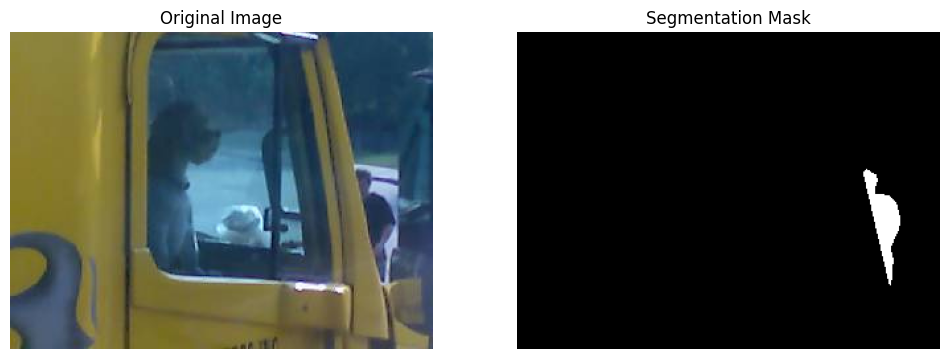

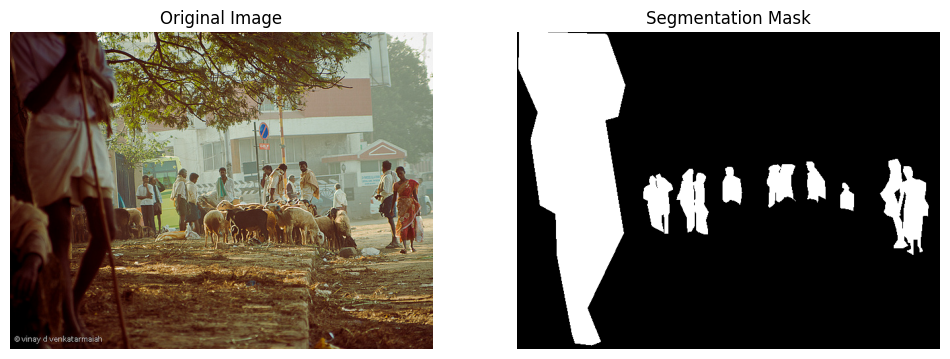

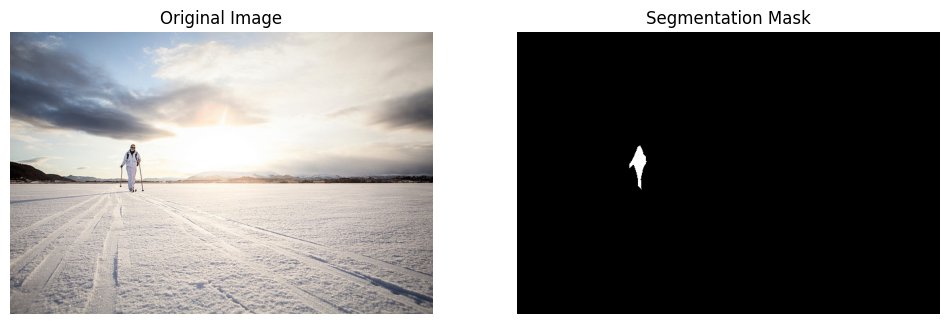

In [8]:
# ✅ Step 6: Visualize sample image and mask pairs

def visualize_sample(index):
    img_id = sampled_img_ids[index]
    img, mask = load_image_and_mask(coco, img_id)

    plt.figure(figsize=(12, 5))

    # Show image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title('Original Image')
    plt.axis('off')

    # Show mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.title('Segmentation Mask')
    plt.axis('off')

    plt.show()

# Visualize the first 3 images and their masks
for i in range(3):
    visualize_sample(i)


In [9]:
# ✅ Step 7: Define a segmentation model using any CNN backbone
import torch
import torch.nn as nn
import torchvision.models as models

# A basic segmentation model that uses a CNN backbone for feature extraction
class SegmentationModel(nn.Module):
    def __init__(self, backbone, num_classes=2):  # num_classes=2: background + object
        super(SegmentationModel, self).__init__()
        self.backbone = backbone
        self.decoder = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, num_classes, kernel_size=1)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.decoder(x)
        return x


In [10]:
# ✅ Step 8: Create helper functions to extract feature maps from CNN backbones

def get_backbone_resnet50():
    model = models.resnet50(pretrained=True)
    layers = list(model.children())[:-2]  # Remove avgpool and fc
    return nn.Sequential(*layers)

def get_backbone_vgg16():
    model = models.vgg16(pretrained=True)
    features = list(model.features.children())[:-1]  # Keep till last conv layer
    return nn.Sequential(*features)

def get_backbone_alexnet():
    model = models.alexnet(pretrained=True)
    features = list(model.features.children())[:-1]  # Remove last pooling
    return nn.Sequential(*features)

def get_backbone_googlenet():
    model = models.googlenet(pretrained=True, aux_logits=False)
    # Extract up to 'inception5b' (last feature block before pooling)
    return nn.Sequential(*list(model.children())[:-2])


In [12]:
# ✅ Step 9: Initialize segmentation models for each backbone
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Instantiate each model
model_resnet50 = SegmentationModel(get_backbone_resnet50()).to(device)
model_vgg16    = SegmentationModel(get_backbone_vgg16()).to(device)
model_alexnet  = SegmentationModel(get_backbone_alexnet()).to(device)
model = models.googlenet(weights='IMAGENET1K_V1')  # or use weights='DEFAULT' if using latest torchvision


# Print model structure (optional - shows decoder and backbone)
print("ResNet50 Segmentation Model:")
print(model_resnet50)

# You can print the others similarly:
# print(model_vgg16)
# print(model_alexnet)
# print(model_googlenet)


Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:00<00:00, 150MB/s]

ResNet50 Segmentation Model:
SegmentationModel(
  (backbone): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample)

In [14]:
# ✅ Step 10: Create a custom PyTorch Dataset for COCO segmentation
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CocoSegmentationDataset(Dataset):
    def __init__(self, coco, img_ids, transform=None, target_transform=None):
        self.coco = coco
        self.img_ids = img_ids
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_ids)

    def __getitem__(self, idx):
        img_id = self.img_ids[idx]
        img, mask = load_image_and_mask(self.coco, img_id)

        # Resize for uniformity (smaller for Colab limits)
        img = cv2.resize(img, (224, 224))
        mask = cv2.resize(mask, (224, 224), interpolation=cv2.INTER_NEAREST)

        if self.transform:
            img = self.transform(img)
        if self.target_transform:
            mask = self.target_transform(mask)

        return img, mask.long()

# Define transforms
transform_img = transforms.Compose([
    transforms.ToTensor(),  # Converts HWC [0,255] -> CHW [0.0, 1.0]
])

transform_mask = transforms.Lambda(lambda x: torch.from_numpy(x).long())

# Create dataset and dataloader
dataset = CocoSegmentationDataset(coco, sampled_img_ids, transform=transform_img, target_transform=transform_mask)
train_loader = DataLoader(dataset, batch_size=4, shuffle=True)

print("✔️ Data loader is ready.")


✔️ Data loader is ready.


In [20]:
# ✅ Step 11: Define loss, optimizer, and training loop

import torch.nn.functional as F

# Use CrossEntropyLoss for 2-class segmentation (background vs object)
criterion = nn.CrossEntropyLoss()

# We'll test on ResNet50 model first
model = model_resnet50  # You can swap with model_vgg16, model_alexnet, model_googlenet
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Basic training loop (1 epoch for now)
def train_one_epoch(model, loader, criterion, optimizer, device):
    model.train()
    epoch_loss = 0

    for imgs, masks in loader:
        imgs, masks = imgs.to(device), masks.to(device)
        optimizer.zero_grad()

        outputs = model(imgs)
        outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)

        loss = criterion(outputs, masks)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    return epoch_loss / len(loader)

# Run a single epoch (you can loop for more later)
avg_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
print(f"✔️ Training complete. Avg loss: {avg_loss:.4f}")


✔️ Training complete. Avg loss: 0.4727


In [16]:
# ✅ UPDATED: General-purpose segmentation model with flexible decoder input
class SegmentationModel(nn.Module):
    def __init__(self, backbone, backbone_out_channels, num_classes=2):
        super(SegmentationModel, self).__init__()
        self.backbone = backbone
        self.decoder = nn.Sequential(
            nn.Conv2d(backbone_out_channels, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Upsample(scale_factor=2),
            nn.Conv2d(64, num_classes, kernel_size=1)
        )

    def forward(self, x):
        x = self.backbone(x)
        x = self.decoder(x)
        return x


In [19]:
model_resnet50 = SegmentationModel(get_backbone_resnet50(), backbone_out_channels=2048).to(device)
model_vgg16    = SegmentationModel(get_backbone_vgg16(), backbone_out_channels=512).to(device)
model_alexnet  = SegmentationModel(get_backbone_alexnet(), backbone_out_channels=256).to(device)
model_googlenet = SegmentationModel(get_backbone_googlenet(), backbone_out_channels=1024).to(device)


In [18]:
def get_backbone_googlenet():
    from torchvision.models import GoogLeNet_Weights
    weights = GoogLeNet_Weights.IMAGENET1K_V1  # or use DEFAULT
    model = models.googlenet(weights=weights)  # aux_logits is handled automatically by weights
    return nn.Sequential(*list(model.children())[:-2])


In [21]:
# ✅ Step 12: Evaluation metrics for segmentation

def compute_iou(pred, target, num_classes=2):
    ious = []
    pred = pred.view(-1)
    target = target.view(-1)
    for cls in range(num_classes):
        pred_inds = pred == cls
        target_inds = target == cls
        intersection = (pred_inds & target_inds).sum().item()
        union = (pred_inds | target_inds).sum().item()
        if union == 0:
            ious.append(float('nan'))  # ignore this class
        else:
            ious.append(intersection / union)
    return np.nanmean(ious)

def compute_pixel_accuracy(pred, target):
    correct = (pred == target).sum().item()
    total = target.numel()
    return correct / total

def compute_mean_accuracy(pred, target, num_classes=2):
    accs = []
    for cls in range(num_classes):
        cls_mask = target == cls
        if cls_mask.sum() == 0:
            accs.append(float('nan'))
        else:
            accs.append((pred[cls_mask] == cls).float().mean().item())
    return np.nanmean(accs)

def compute_dice_score(pred, target, smooth=1e-6):
    pred = pred.view(-1)
    target = target.view(-1)
    intersection = (pred * target).sum().item()
    return (2. * intersection + smooth) / (pred.sum().item() + target.sum().item() + smooth)


In [22]:
# ✅ Evaluate on a batch
model.eval()
with torch.no_grad():
    for imgs, masks in train_loader:
        imgs, masks = imgs.to(device), masks.to(device)
        outputs = model(imgs)
        outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)
        preds = torch.argmax(outputs, dim=1)

        iou = compute_iou(preds, masks)
        pix_acc = compute_pixel_accuracy(preds, masks)
        mean_acc = compute_mean_accuracy(preds, masks)
        dice = compute_dice_score(preds, masks)

        print(f"IoU: {iou:.4f}, Pixel Acc: {pix_acc:.4f}, Mean Acc: {mean_acc:.4f}, Dice: {dice:.4f}")
        break  # Just one batch for quick evaluation


IoU: 0.4381, Pixel Acc: 0.8763, Mean Acc: 0.5000, Dice: 0.0000


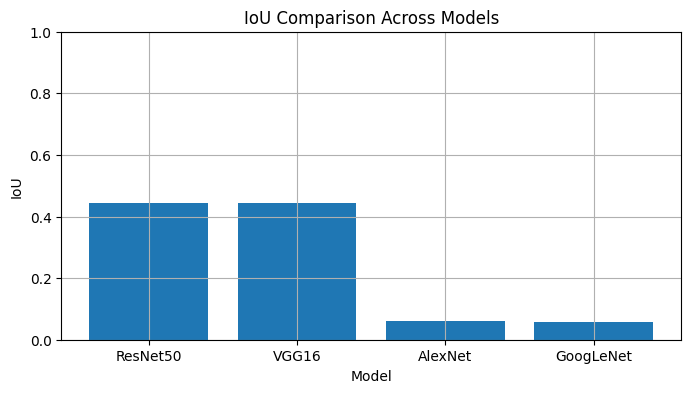

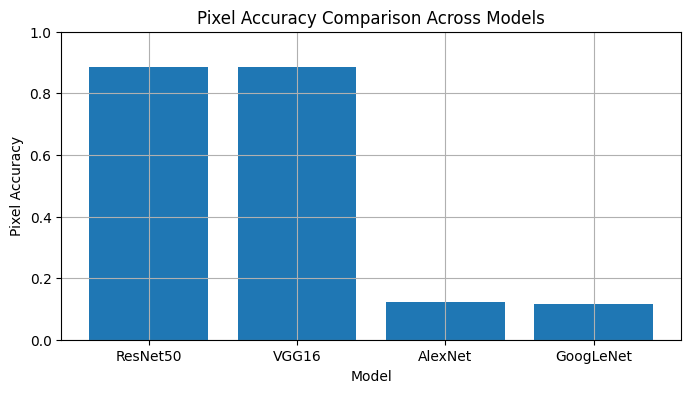

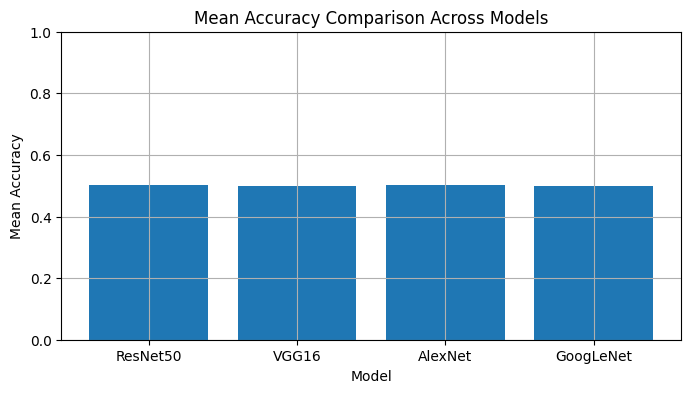

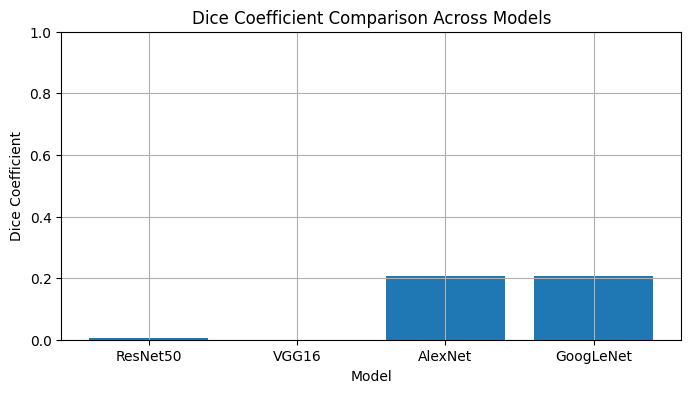

In [23]:
# ✅ Step 13: Evaluate all models and compare metrics visually

models_dict = {
    "ResNet50": model_resnet50,
    "VGG16": model_vgg16,
    "AlexNet": model_alexnet,
    "GoogLeNet": model_googlenet,
}

results = {
    "Model": [],
    "IoU": [],
    "Pixel Accuracy": [],
    "Mean Accuracy": [],
    "Dice Coefficient": []
}

# Evaluate on one batch from the loader
model.eval()
imgs, masks = next(iter(train_loader))
imgs, masks = imgs.to(device), masks.to(device)

for name, model in models_dict.items():
    model.eval()
    with torch.no_grad():
        outputs = model(imgs)
        outputs = F.interpolate(outputs, size=masks.shape[1:], mode='bilinear', align_corners=False)
        preds = torch.argmax(outputs, dim=1)

        # Compute metrics
        iou = compute_iou(preds, masks)
        pix_acc = compute_pixel_accuracy(preds, masks)
        mean_acc = compute_mean_accuracy(preds, masks)
        dice = compute_dice_score(preds, masks)

        # Store results
        results["Model"].append(name)
        results["IoU"].append(iou)
        results["Pixel Accuracy"].append(pix_acc)
        results["Mean Accuracy"].append(mean_acc)
        results["Dice Coefficient"].append(dice)

# ✅ Plot comparison graphs
import matplotlib.pyplot as plt

def plot_metric(metric_name):
    plt.figure(figsize=(8, 4))
    plt.bar(results["Model"], results[metric_name])
    plt.title(f"{metric_name} Comparison Across Models")
    plt.ylabel(metric_name)
    plt.xlabel("Model")
    plt.ylim(0, 1.0)
    plt.grid(True)
    plt.show()

# Plot all metrics
for metric in ["IoU", "Pixel Accuracy", "Mean Accuracy", "Dice Coefficient"]:
    plot_metric(metric)
